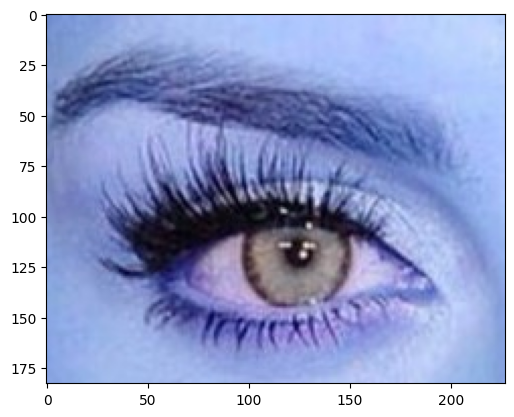

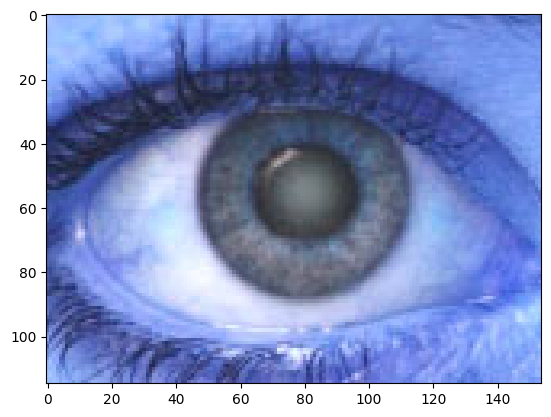

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory


DATADIR = r"C:\Users\DELL\Documents\eye_cataract\dataset\train"
CATEGORIES = ["normal", "cataract"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
        


In [2]:
print(img_array.shape)

(115, 154, 3)


In [3]:

def dataeate_data(path):
    data = []
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                files = glob.glob(path+"/"+category+"/*")
                for f in files:
                    img_array = cv2.imread(f)
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    data.append([np.array(img_array), CATEGORIES.index(category)])
            except Exception as e:
                pass     
    np.random.shuffle(data)


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_data_dir = r"C:\Users\DELL\Documents\eye_cataract\dataset\train"
test_data_dir = r"C:\Users\DELL\Documents\eye_cataract\dataset\test"


train_datagen = ImageDataGenerator(rescale=1./255, 
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                              target_size=(224, 224), 
                                              batch_size=32,
                                              class_mode='binary')


test_generator = test_datagen.flow_from_directory(test_data_dir,
                                            target_size=(224, 224),  
                                            batch_size=32,
                                            class_mode='binary')
         

Found 491 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [7]:
#Implementing convulational Neural Network
model = keras.Sequential([
    
  
    layers.Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(256, (3, 3), activation='relu'),#added a new convulational layer
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),#reshapes the 3D feature map into one-dimensional vector
    layers.Dense(256, activation='relu'),#raised the dense layers to 256
    
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
    
   
])

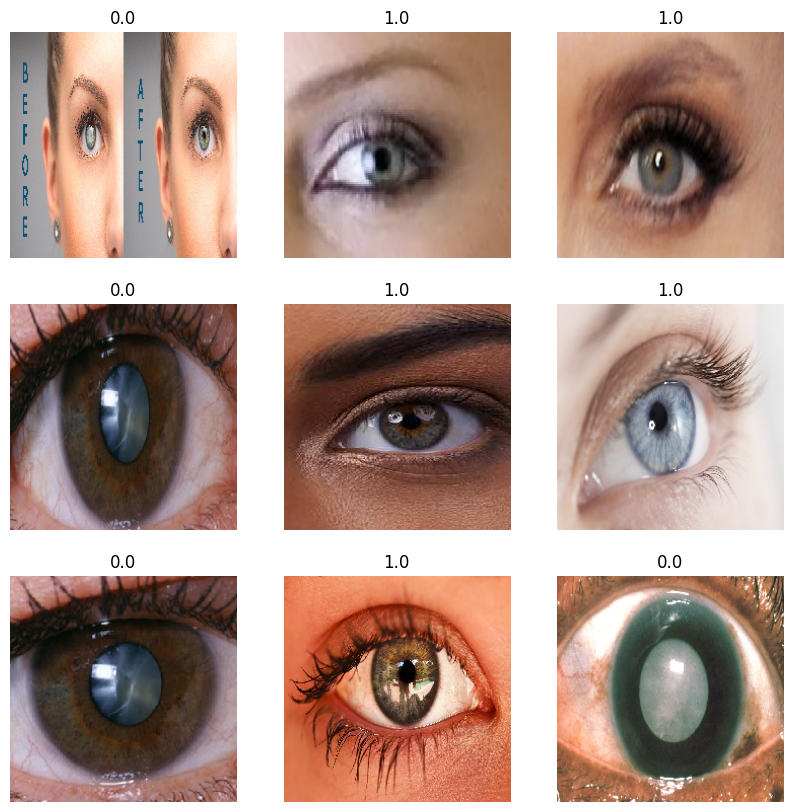

In [5]:
import matplotlib.pyplot as plt

images, labels = next(test_generator)

plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(str(labels[i]) if labels[i] == 0 else str(labels[i]))
    plt.axis('off')

plt.show()

In [6]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="eye_cat_logs")

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_generator,epochs=90,validation_data = test_generator)
model.save('cateye-CNN.model')

Epoch 1/90
16/16 [==============================] - 84s 5s/step - loss: 0.8496 - accuracy: 0.4786 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 2/90
16/16 [==============================] - 72s 5s/step - loss: 0.6899 - accuracy: 0.5092 - val_loss: 0.6732 - val_accuracy: 0.7627
Epoch 3/90
16/16 [==============================] - 73s 5s/step - loss: 0.6365 - accuracy: 0.6314 - val_loss: 0.5099 - val_accuracy: 0.7966
Epoch 4/90
16/16 [==============================] - 72s 4s/step - loss: 0.5744 - accuracy: 0.7088 - val_loss: 0.5233 - val_accuracy: 0.7627
Epoch 5/90
16/16 [==============================] - 71s 4s/step - loss: 0.5460 - accuracy: 0.7332 - val_loss: 0.5193 - val_accuracy: 0.7373
Epoch 6/90
16/16 [==============================] - 72s 4s/step - loss: 0.5523 - accuracy: 0.7271 - val_loss: 0.4523 - val_accuracy: 0.7797
Epoch 7/90
16/16 [==============================] - 72s 4s/step - loss: 0.5118 - accuracy: 0.7393 - val_loss: 0.4774 - val_accuracy: 0.7458
Epoch 8/90
16/16 [==

INFO:tensorflow:Assets written to: cateye-CNN.model\assets


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [10]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

4/4 [==============================] - 10s 2s/step - loss: 0.2674 - accuracy: 0.9746
Test accuracy: 0.9745762944221497


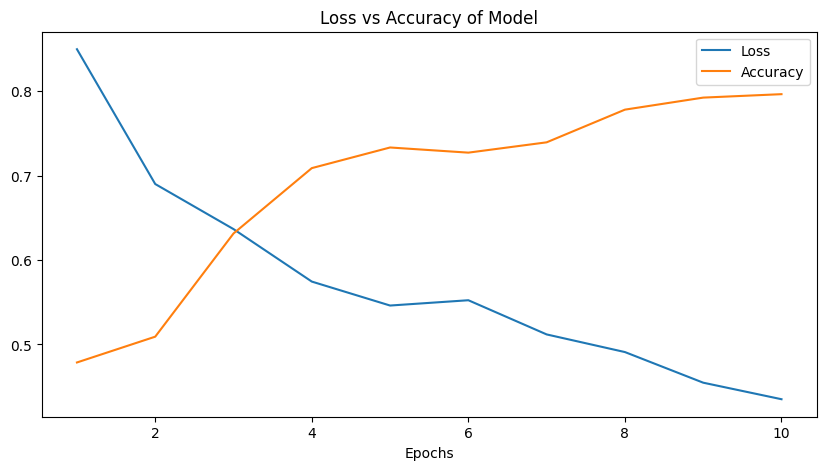

In [11]:
import matplotlib.pyplot as plt

epochs = range(1, 11) 
plt.figure(figsize=(10, 5))
plt.title("Loss vs Accuracy of Model")
plt.plot(epochs, history.history['loss'][:10], label='Loss')
plt.plot(epochs, history.history['accuracy'][:10], label='Accuracy')
plt.grid()
plt.xlabel("Epochs")
plt.grid()
plt.legend()
plt.show()


In [12]:
from tensorflow.keras.preprocessing import image
test_image_path = r'C:\Users\DELL\Documents\eye_cataract\normal.png'
img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  

prediction = model.predict(img_array)

binary_prediction = 1 if prediction[0] > 0.5 else 0

label_string = 'Normal' if binary_prediction == 1 else 'Cataract'
print("Actual: Normal")
print(f"Predicted: {label_string}")


1/1 [==============================] - 0s 411ms/step
Actual: Normal
Predicted: Normal


In [13]:
test_image_path = r"C:\Users\DELL\Documents\eye_cataract\cataract.png" 
img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  

prediction = model.predict(img_array)

binary_prediction = 1 if prediction[0] > 0.5 else 0

label_string = 'Normal' if binary_prediction == 1 else 'Cataract'
print("Actual: Cataract")
print(f"Predicted: {label_string}")


1/1 [==============================] - 0s 90ms/step
Actual: Cataract
Predicted: Cataract


In [14]:
test_image_path = r"C:\Users\DELL\Documents\eye_cataract\cat.jpg" 
img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  

prediction = model.predict(img_array)

binary_prediction = 1 if prediction[0] > 0.5 else 0

label_string = 'Normal' if binary_prediction == 1 else 'Cataract'
print("Actual: Cataract")
print(f"Predicted: {label_string}")

1/1 [==============================] - 0s 79ms/step
Actual: Cataract
Predicted: Normal


In [15]:
test_image_path = r"C:\Users\DELL\Documents\eye_cataract\cataract.png"
img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  

prediction = model.predict(img_array)

binary_prediction = 1 if prediction[0] > 0.5 else 0

label_string = 'Normal' if binary_prediction == 1 else 'Cataract'
print("Actual: Cataract")
print(f"Predicted: {label_string}")

1/1 [==============================] - 0s 93ms/step
Actual: Cataract
Predicted: Cataract


In [16]:
test_image_path = r"C:\Users\DELL\Documents\eye_cataract\nor6.png"
img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  

prediction = model.predict(img_array)

binary_prediction = 1 if prediction[0] > 0.5 else 0

label_string = 'Normal' if binary_prediction == 1 else 'Cataract'
print("Actual: Normal")
print(f"Predicted: {label_string}")

1/1 [==============================] - 0s 94ms/step
Actual: Normal
Predicted: Normal


4/4 [==============================] - 10s 2s/step
Confusion Matrix:
[[31 28]
 [27 32]]


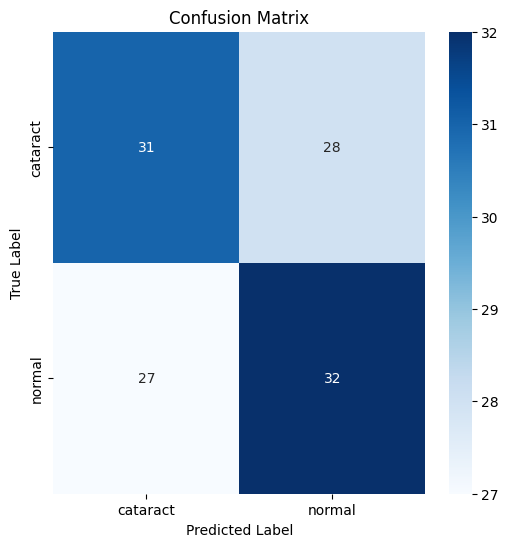

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... Your existing code for loading test data and making predictions ...

# Assuming 'test_generator' is an ImageDataGenerator instance
y_true = test_generator.classes  # True labels
y_pred = model.predict(test_generator)  # Predicted probabilities

# Convert probabilities to binary predictions using a threshold
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_binary)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_mtx)

# Plot confusion matrix with annotations
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [18]:
test_image_path = r"C:\Users\DELL\Documents\eye_cataract\nani.jpg"
img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  

prediction = model.predict(img_array)

binary_prediction = 1 if prediction[0] > 0.5 else 0

label_string = 'Normal' if binary_prediction == 1 else 'Cataract'
# print("Actual: Normal")
print(f"Predicted: {label_string}")

1/1 [==============================] - 0s 110ms/step
Predicted: Cataract


In [19]:
 test_image_path = r"C:\Users\DELL\Documents\eye_cataract\nani_left.jpg"
img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  

prediction = model.predict(img_array)

binary_prediction = 1 if prediction[0] > 0.5 else 0

label_string = 'Normal' if binary_prediction == 1 else 'Cataract'
# print("Actual: Normal")
print(f"Predicted: {label_string}")

1/1 [==============================] - 0s 94ms/step
Predicted: Cataract


In [20]:
test_image_path = r"C:\Users\DELL\Documents\eye_cataract\tanu_bhai.jpg"
img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  

prediction = model.predict(img_array)

binary_prediction = 1 if prediction[0] > 0.5 else 0

label_string = 'Normal' if binary_prediction == 1 else 'Cataract'
print("Actual: Normal")
print(f"Predicted: {label_string}")

1/1 [==============================] - 0s 78ms/step
Actual: Normal
Predicted: Normal


In [27]:
test_image_path =r"C:\Users\DELL\Documents\eye_cataract\eye_cataract\nani.jpg"
img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  

prediction = model.predict(img_array)

binary_prediction = 1 if prediction[0] > 0.5 else 0

label_string = 'Normal' if binary_prediction == 1 else 'Cataract'
print("Actual: Cataract")
print(f"Predicted: {label_string}")

1/1 [==============================] - 0s 132ms/step
Actual: Cataract
Predicted: Cataract


In [26]:
test_image_path =r"C:\Users\DELL\Documents\eye_cataract\tanu_bhai.jpg"
img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  

prediction = model.predict(img_array)

binary_prediction = 1 if prediction[0] > 0.5 else 0

label_string = 'Normal' if binary_prediction == 1 else 'Cataract'
print("Actual: Normal")
print(f"Predicted: {label_string}")
img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  

prediction = model.predict(img_array)

binary_prediction = 1 if prediction[0] > 0.5 else 0

label_string = 'Normal' if binary_prediction == 1 else 'Cataract'
print("Actual: Normal")
print(f"Predicted: {label_string}")

1/1 [==============================] - 0s 109ms/step
Actual: Normal
Predicted: Normal
1/1 [==============================] - 0s 99ms/step
Actual: Normal
Predicted: Normal
